# Transformation des fichiers MIDI en un fichier CSV

In [1]:
!pip install pretty_midi

     |████████████████████████████████| 5.6 MB 5.5 MB/s 
     |████████████████████████████████| 51 kB 932 kB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=8567b419e8c0054d2128d78afec0a27e9beeba40293b48fce15ec5598183be2f
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi


In [2]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: pytz, numpy, python-dateutil
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fbprophet, fastai, cufflinks, cmdstanpy, arviz, altair


In [3]:
!pip install mido 

In [5]:
import numpy as np
import pandas as pd
import mido
from mido import MidiFile
import pretty_midi
from pretty_midi import TimeSignature
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

midi_files = pd.DataFrame(columns = ['Composer',  'Piece', 'Length', 'Tempo', 'Time_Signature', 'Pitch', 'Unique_Velocities', 'Duration', 'Average_Velocity', 'Min_Velocity', 'Max_Velocity'])
total_files = 0
processed_files = 0


for file in os.listdir('/content/drive/MyDrive/Data2/'):

    row = []
    total_files += 1

    if file.endswith('.mid') or file.endswith('.MID'):
        clip = MidiFile(f'/content/drive/MyDrive/Data2/{file}')
        if clip.type == 0:
            pretty_clip = pretty_midi.PrettyMIDI(f'/content/drive/MyDrive/Data2/{file}')
            
            # Identifier le compositeur a partir du titre du fichier MIDI
            composer = file[file.find('_C--') + len('_C--') : file.find('_T--')]
            piece = file[file.find('_T--') + len('_T--') : file.find('.')]
            
            # Extraire la longueur, le tempo et la signature temporelle  a partir de  pretty_midi object
            end_time = pretty_clip.get_end_time()
            tempo = pretty_clip.estimate_tempo()
            times = str(pretty_clip.time_signature_changes)
            time_sig = times[times.find('numerator=') + len('numerator=') : times.find('numerator=') + len('numerator=') + 1] \
                + '/' \
                + times[times.find('denominator=') + len('denominator=') : times.find('denominator=') + len('denominator=') + 1]
           
            # Creation de  liste de velocité
            velocity_list = []
            for instrument in pretty_clip.instruments:
                for note in instrument.notes:
                    velocity_list.append(note.velocity)
                    

            # Creation de  liste de durée 
            duration_list = []
            for instrument in pretty_clip.instruments:
                for note in instrument.notes:
                    duration_list.append(note.duration)
 
            #Création de liste pour Pitch
            pitch=[]
            for instrument in pretty_clip.instruments:
              for note in instrument.notes:
                pitch.append(note.pitch)


            # Ajout des variables 
            row.append(composer)
            row.append(piece)
            row.append(end_time)
            row.append(tempo)
            row.append(time_sig)
            row.append(len(set(pitch)))
            row.append(len(set(duration_list)))
            row.append(len(set(velocity_list)))
            row.append(np.mean(velocity_list))
            row.append(min(velocity_list))
            row.append(max(velocity_list))
            
            # Ajout de la liste a la dataframe
            length = len(midi_files)
            midi_files.loc[length] = row

            processed_files += 1
                
            # affichier que le fichier a été proccessed
            print(f'Processed {processed_files} files.    ', end = '\r')
        else:
            print(f'File not type 0: {file}') 
    else:
        print(f'File not midi: {file}')

print(f'\nProcessed {processed_files} out of {total_files} total files.')

Processed 1249 files.    
Processed 1249 out of 1249 total files.


In [9]:
#affichage de notre base sous format CSV
midi_files.head()   

,Composer,Piece,Length,Tempo,Time_Signature,Pitch,Unique_Velocities,Duration,Average_Velocity,Min_Velocity,Max_Velocity
0,Schubert,WandererFantasiaInCMajorD760,1263.317380,208.601117,4/4,75,2187,106,69.878853,3,109
1,Chopin,EtudeOp25No10,229.271940,221.218255,4/4,71,1058,111,72.096217,2,118
2,Bach,PreludeAndFugueInBFlatMinorWTCBook2,367.498297,188.046396,4/4,47,1188,79,68.575552,4,105
3,Schubert,ImpromptuOp142No3InBFlatMajor,405.515086,212.193278,4/4,72,1370,101,56.989334,2,106
4,Schumann,KreislerianaOp16No8,209.424203,219.355745,4/4,56,718,89,67.392542,4,110


In [10]:
#Ordonner la base par rapport au nom des compositeur
midi_files.sort_values(by = 'Composer', ascending = True, inplace = True)

In [11]:
midi_files.reset_index(drop = True, inplace = True)

In [12]:
midi_files['Length'] = midi_files['Length'].round()
midi_files['Tempo'] = midi_files['Tempo'].round()
#midi_files['Duration'] = midi_files['Duration'].round(2)
midi_files['Average_Velocity'] = midi_files['Average_Velocity'].round(2)

In [13]:
# Convertir les colonnes en type int 
midi_files['Length'] = midi_files['Length'].astype(int)
midi_files['Tempo'] = midi_files['Tempo'].astype(int)
midi_files['Unique_Velocities'] = midi_files['Unique_Velocities'].astype(int)
midi_files['Min_Velocity'] = midi_files['Min_Velocity'].astype(int)
midi_files['Max_Velocity'] = midi_files['Max_Velocity'].astype(int)

In [14]:
#reafficher la base
midi_files.head()

,Composer,Piece,Length,Tempo,Time_Signature,Pitch,Unique_Velocities,Duration,Average_Velocity,Min_Velocity,Max_Velocity
0,Bach,ItalianConcertoBWV9713rdMov,224,233,4/4,49,866,83,66.16,3,98
1,Bach,ToccataInCMinorBWV911,2226,195,4/4,74,3128,111,66.43,2,115
2,Bach,JesuJoyOfMansDesiringBWV147,208,209,4/4,48,967,76,45.37,3,92
3,Bach,PreludeAndFugueInEMajorWTCBook1,151,220,4/4,44,644,63,67.47,34,100
4,Bach,PreludeAndFugueInGSharpMinorWTCBook1,300,168,4/4,48,918,65,66.07,16,96


In [15]:
# Enregistrer la base 
midi_files.to_csv('/content/drive/MyDrive/BaseMidiFinale2.csv', index = False)

# Familiarisation avec la base

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('/content/drive/MyDrive/BaseMidiFinale2.csv')

In [18]:
data.shape

(1249, 11)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Composer           1249 non-null   object 
 1   Piece              1249 non-null   object 
 2   Length             1249 non-null   int64  
 3   Tempo              1249 non-null   int64  
 4   Time_Signature     1249 non-null   object 
 5   Pitch              1249 non-null   int64  
 6   Unique_Velocities  1249 non-null   int64  
 7   Duration           1249 non-null   int64  
 8   Average_Velocity   1249 non-null   float64
 9   Min_Velocity       1249 non-null   int64  
 10  Max_Velocity       1249 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 107.5+ KB


In [20]:
print(data.describe(include='all'))

       Composer         Piece       Length        Tempo Time_Signature  \
count      1249          1249  1249.000000  1249.000000           1249   
unique       10           737          NaN          NaN              1   
top        Bach  EtudeOp10No8          NaN          NaN            4/4   
freq        150            17          NaN          NaN           1249   
mean        NaN           NaN   526.172938   204.178543            NaN   
std         NaN           NaN   425.925748    20.289554            NaN   
min         NaN           NaN    65.000000    72.000000            NaN   
25%         NaN           NaN   255.000000   197.000000            NaN   
50%         NaN           NaN   389.000000   208.000000            NaN   
75%         NaN           NaN   624.000000   216.000000            NaN   
max         NaN           NaN  2629.000000   255.000000            NaN   

              Pitch  Unique_Velocities     Duration  Average_Velocity  \
count   1249.000000        1249.000000

In [21]:
data['Composer'].value_counts() 

Bach            150
Beethoven       150
Chopin          150
Liszt           150
Schubert        150
Rachmaninoff    101
Haydn           100
Prokofiev       100
Ravel           100
Schumann         98
Name: Composer, dtype: int64

In [22]:
data['Time_Signature'].value_counts()

4/4    1249
Name: Time_Signature, dtype: int64

In [23]:
data.isnull().values.any()

False

# Visualisation 

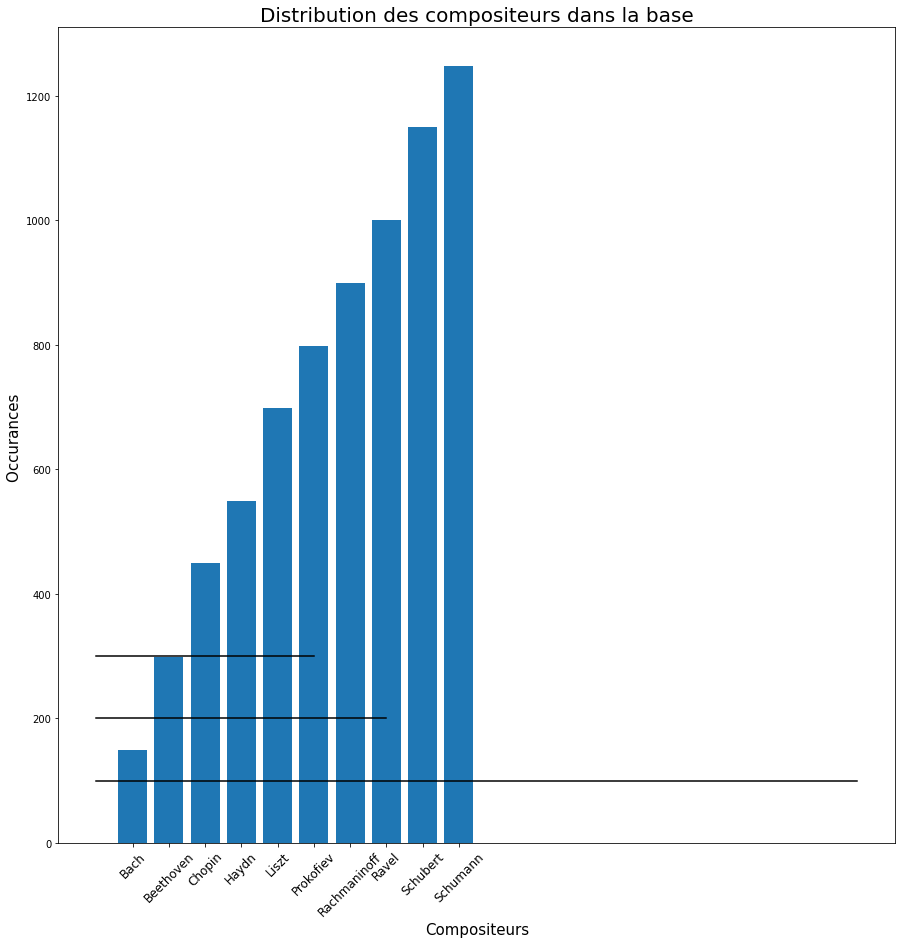

In [24]:
#Composer distribution plot
plt.figure(figsize = (15,15))
plt.bar(data['Composer'], data['Composer'].index)
plt.plot([-1, 20], [100, 100], color = 'black')
plt.plot([-1, 7], [200, 200], color = 'black')
plt.plot([-1, 5], [300, 300], color = 'black')
plt.title('Distribution des compositeurs dans la base', fontsize = 20)
plt.ylabel('Occurances ', fontsize = 15)
plt.xlabel('Compositeurs', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()
#Ca reste a verifier le graphe!!

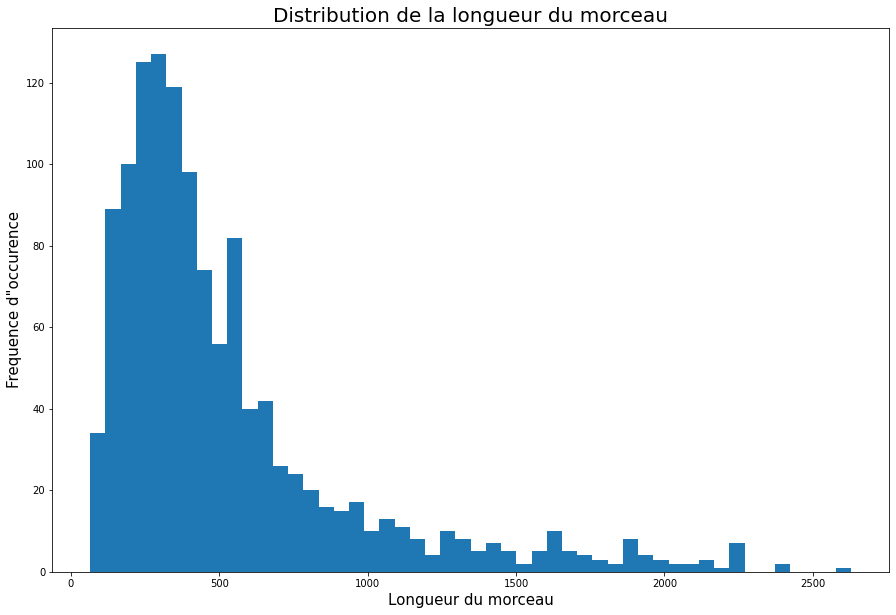

In [25]:
#length distribution plot
plt.figure(figsize = (15,10))
plt.hist(data['Length'], bins = 50)
plt.ylabel('Frequence d"occurence', fontsize = 15)
plt.xlabel('Longueur du morceau', fontsize = 15)
plt.title('Distribution de la longueur du morceau', fontsize = 20)
plt.show()

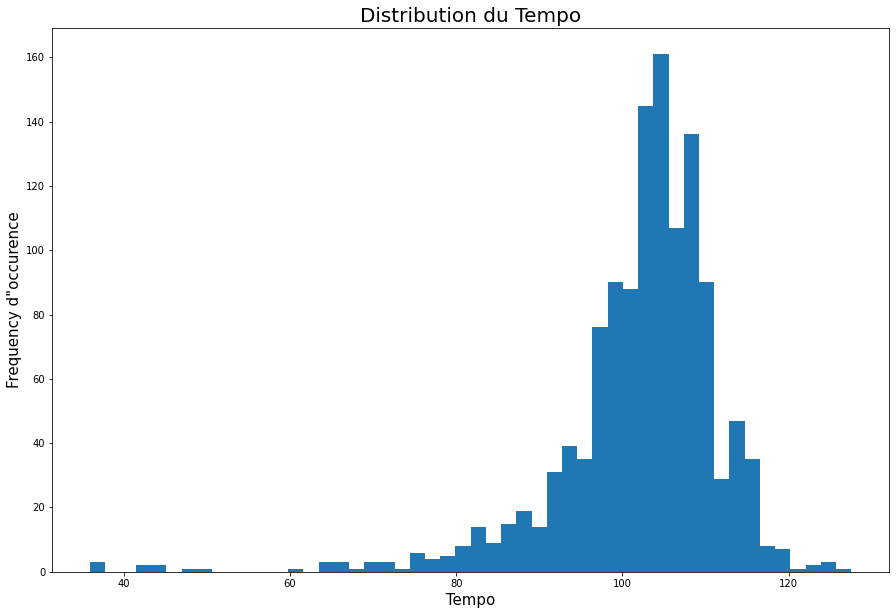

In [26]:
# Tempo distribution plot
plt.figure(figsize = (15,10))
plt.hist(data['Tempo']/2, bins = 50)
plt.ylabel('Frequency d"occurence', fontsize = 15)
plt.xlabel(' Tempo ', fontsize = 15)
plt.title('Distribution du Tempo', fontsize = 20)
plt.show()

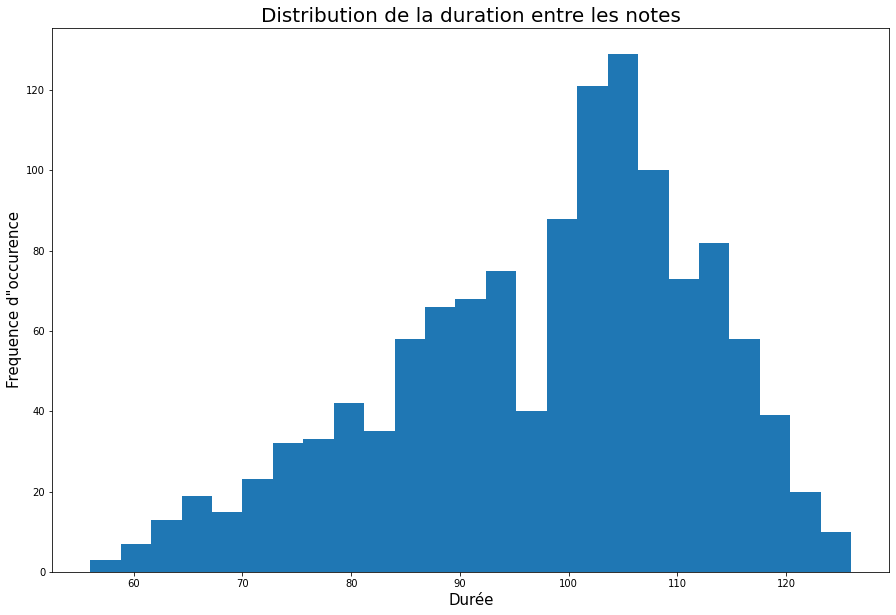

In [27]:
# Duration distribution plot
plt.figure(figsize = (15,10))
plt.hist(data['Duration'], bins = 25)
plt.ylabel('Frequence d"occurence', fontsize = 15)
plt.xlabel('Durée', fontsize = 15)
plt.title('Distribution de la duration entre les notes', fontsize = 20)
plt.show()

In [ ]:
#ajouter un pour velocité

# Preprocessing

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:
data=data.drop(['Piece'],axis=1)


In [27]:
data.head(2)

,Composer,Length,Tempo,Time_Signature,Unique_Velocities,Duration,Average_Velocity,Min_Velocity,Max_Velocity
0,Bach,224,233,4/4,866,83,66.16,3,98
1,Bach,2226,195,4/4,3128,111,66.43,2,115


**Encodage de nos Variables categoriques**

In [30]:
data['Composer'] = data['Composer'].map({'Beethoven' :0, 'Chopin' :1, 'Liszt' :2, 'Bach' :3, 'Schubert' :4, 'Haydn' :5, 'Prokofiev' :6, 'Rachmaninoff' :7, 'Ravel' :8, 'Schumann':9 }) #mapping numbers
data.head()

,Composer,Length,Tempo,Time_Signature,Pitch,Unique_Velocities,Duration,Average_Velocity,Min_Velocity,Max_Velocity
0,3,224,233,4/4,49,866,83,66.16,3,98
1,3,2226,195,4/4,74,3128,111,66.43,2,115
2,3,208,209,4/4,48,967,76,45.37,3,92
3,3,151,220,4/4,44,644,63,67.47,34,100
4,3,300,168,4/4,48,918,65,66.07,16,96


In [31]:
data=pd.get_dummies(data)

**Diviser les données en 2 sous ensembles pour l'apprentissage et le test**

In [32]:
#Séparer les entrées (caractéristiques) et la sortie (classe)
y=data['Composer']
x=data.drop(['Composer'],axis=1)

In [33]:
#Diviser les données en deux ensembles: entraînement et test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=0) 

**Normalisation des données**

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[['Length', 'Tempo', 'Time_Signature_4/4', 'Pitch', 'Unique_Velocities', 'Duration', 'Average_Velocity', 'Min_Velocity', 'Max_Velocity']]=scaler.fit_transform(x_train[['Length', 'Tempo', 'Time_Signature_4/4', 'Pitch', 'Unique_Velocities', 'Duration', 'Average_Velocity', 'Min_Velocity', 'Max_Velocity']])
x_test[['Length', 'Tempo', 'Time_Signature_4/4', 'Pitch', 'Unique_Velocities', 'Duration', 'Average_Velocity', 'Min_Velocity', 'Max_Velocity']]=scaler.transform(x_test[['Length', 'Tempo', 'Time_Signature_4/4', 'Pitch', 'Unique_Velocities', 'Duration', 'Average_Velocity', 'Min_Velocity', 'Max_Velocity']])


In [39]:
x_train[['Length', 'Tempo', 'Time_Signature_4/4', 'Pitch', 'Unique_Velocities', 'Duration', 'Average_Velocity', 'Min_Velocity', 'Max_Velocity']]

,Length,Tempo,Time_Signature_4/4,Pitch,Unique_Velocities,Duration,Average_Velocity,Min_Velocity,Max_Velocity
5,0.042122,0.890710,0.0,0.296296,0.095757,0.300000,0.840260,0.060606,0.355556
328,0.072933,0.770492,0.0,0.685185,0.231651,0.785714,0.745592,0.060606,0.755556
629,0.088924,0.770492,0.0,0.814815,0.247706,0.685714,0.788623,0.151515,0.644444
958,0.065133,0.830601,0.0,0.666667,0.083142,0.800000,0.769731,0.030303,1.000000
905,0.185257,0.808743,0.0,0.962963,0.195528,0.742857,0.604114,0.060606,0.755556
...,...,...,...,...,...,...,...,...,...
763,0.139236,0.650273,0.0,0.722222,0.269782,0.714286,0.459278,0.060606,0.755556
835,0.086973,0.737705,0.0,0.759259,0.313073,0.771429,0.772040,0.030303,0.822222
1216,0.612324,0.726776,0.0,0.777778,0.684920,0.842857,0.730688,0.030303,0.844444
559,0.164977,0.715847,0.0,0.833333,0.224484,0.800000,0.687657,0.030303,0.955556


# Modeling :

**Application du modele KNeighborsClassifier**

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors' : np.arange(1,51),
           'metric': ['euclidean' ,'manhattan','minkowski'],
           'weights' :[ 'uniform','distance']} #dictionaire qui contient les paramtres qu'on veut regler
KNeighborsClassifier()
knn_grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']})

In [41]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [42]:
# n_neighbors=1
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9,metric='manhattan',weights='distance')
# la méthode fit pour entrainer un modèle
knn.fit(x_train, y_train)
# la méthode score pour calculer le test_score ou le train_score
print('Le train score est :', knn.score(x_train, y_train))
print('Le test score est :', knn.score(x_test, y_test))

Le train score est : 1.0
Le test score est : 0.5384615384615384


In [43]:
ypredknn=knn.predict(x_train)
ypredknn

array([3, 1, 2, ..., 9, 2, 2])

In [44]:
ypredknn[0]

3

In [45]:
import pickle
with open ('/content/drive/MyDrive/model','wb') as file:
  pickle.dump(knn,file)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


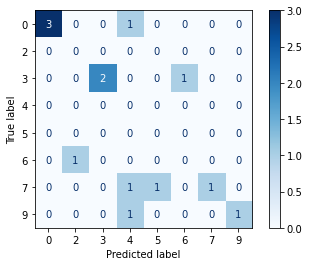

In [46]:
from sklearn.metrics import plot_confusion_matrix

y_pred=knn.predict(x_test)
plot_confusion_matrix(knn,x_test,y_test,cmap=plt.cm.Blues); 

In [47]:
from sklearn.metrics import classification_report

y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.750000  0.857143         4
           2   0.000000  0.000000  0.000000         0
           3   1.000000  0.666667  0.800000         3
           4   0.000000  0.000000  0.000000         0
           5   0.000000  0.000000  0.000000         0
           6   0.000000  0.000000  0.000000         1
           7   1.000000  0.333333  0.500000         3
           9   1.000000  0.500000  0.666667         2

    accuracy                       0.538462        13
   macro avg   0.500000  0.281250  0.352976        13
weighted avg   0.923077  0.538462  0.666300        13



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Application de Logistic Regression 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

In [49]:
grid.best_params_                                

In [50]:
from sklearn.linear_model import LogisticRegression
#random_state=0,
logre_model = LogisticRegression(C=8.98989898989899, penalty = 'l1', solver='saga')
logre_model.fit(x_train, y_train)

print('train score : ' , logre_model.score(x_train, y_train) )
print('test score : ' , logre_model.score(x_test,y_test) )

train score :  0.5485436893203883
test score :  0.3076923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [51]:
ypredlog=logre_model.predict(x_test)
ypredlog

array([4, 0, 4, 6, 3, 4, 0, 4, 4, 0, 6, 0, 3])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


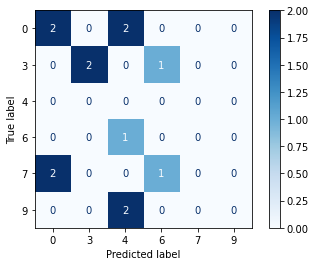

In [52]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logre_model,x_test,y_test,cmap=plt.cm.Blues);

In [53]:
y_predi=logre_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.50000   0.50000   0.50000         4
           3    1.00000   0.66667   0.80000         3
           4    0.00000   0.00000   0.00000         0
           6    0.00000   0.00000   0.00000         1
           7    0.00000   0.00000   0.00000         3
           9    0.00000   0.00000   0.00000         2

    accuracy                        0.30769        13
   macro avg    0.25000   0.19444   0.21667        13
weighted avg    0.38462   0.30769   0.33846        13



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**Apllication du modele SVM**

In [54]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_range =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = {'kernel': ['linear', 'rbf'], 
              'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(svm.SVC(), param_grid, cv=5)

grid.fit(x_train, y_train)
grid.best_params_

In [68]:
from sklearn import svm

svm_model=svm.SVC(C=100,kernel='rbf',gamma=1)
svm_model.fit(x_train,y_train)

print('train score : ' ,svm_model.score(x_train,y_train))
print('test score : ' ,svm_model.score(x_test,y_test))

train score :  0.7467637540453075
test score :  0.6153846153846154


In [62]:
ypredsvm=svm_model.predict(x_test)
ypredsvm

array([2, 7, 0, 7, 3, 4, 0, 4, 9, 9, 6, 0, 3])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


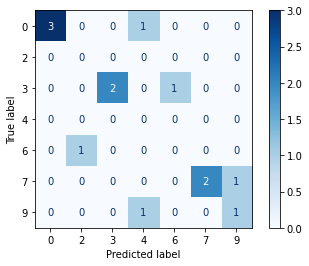

In [64]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(svm_model,x_test,y_test,cmap=plt.cm.Blues);

In [65]:
from sklearn.metrics import classification_report

y_predi=svm_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.75000   0.85714         4
           2    0.00000   0.00000   0.00000         0
           3    1.00000   0.66667   0.80000         3
           4    0.00000   0.00000   0.00000         0
           6    0.00000   0.00000   0.00000         1
           7    1.00000   0.66667   0.80000         3
           9    0.50000   0.50000   0.50000         2

    accuracy                        0.61538        13
   macro avg    0.50000   0.36905   0.42245        13
weighted avg    0.84615   0.61538   0.70989        13



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
        
# Regardons la construction d'une DataFrame
import numpy as np
import pandas as pd

"""l=['KNeighborsClassifier','LogisticRegression','SVM']
train_score = pd.Series([0.5477,0.4341,0.5919], index=l)
test_score = pd.Series([0.4618,0.3574,0.5100], index=l)
f1_score_Beethoven  = pd.Series([ 0.317460,0.23333,0.36923], index=l)
f1_score_Chopin  = pd.Series([ 0.492754,0.28571,0.50746], index=l)
f1_score_Liszt = pd.Series([ 0.430380,0.42500,0.52055], index=l)
f1_score_Bach  = pd.Series([ 0.847458,0.68657,0.77419], index=l)
f1_score_Schubert  = pd.Series([ 0.521739,0.36923,0.47458], index=l)
f1_score_Haydn  = pd.Series([ 0.588235,0.21622,0.64865], index=l)
f1_score_Prokofiev  = pd.Series([ 0.222222,0.51429,0.48276], index=l)
f1_score_Rachmaninoff  = pd.Series([ 0.230769,0.08696,0.41379], index=l)
f1_score_Ravel  = pd.Series([ 0.421053,0.29268,0.35897], index=l)
f1_score_Schumann  = pd.Series([ 0.235294,0.07407,0.47368], index=l)

accuary = pd.Series([0.4618,0.3574,0.5100], index=l)"""


"l=['KNeighborsClassifier','LogisticRegression','SVM']\ntrain_score = pd.Series([0.5477,0.4341,0.5919], index=l)\ntest_score = pd.Series([0.4618,0.3574,0.5100], index=l)\nf1_score_Beethoven  = pd.Series([ 0.317460,0.23333,0.36923], index=l)\nf1_score_Chopin  = pd.Series([ 0.492754,0.28571,0.50746], index=l)\nf1_score_Liszt = pd.Series([ 0.430380,0.42500,0.52055], index=l)\nf1_score_Bach  = pd.Series([ 0.847458,0.68657,0.77419], index=l)\nf1_score_Schubert  = pd.Series([ 0.521739,0.36923,0.47458], index=l)\nf1_score_Haydn  = pd.Series([ 0.588235,0.21622,0.64865], index=l)\nf1_score_Prokofiev  = pd.Series([ 0.222222,0.51429,0.48276], index=l)\nf1_score_Rachmaninoff  = pd.Series([ 0.230769,0.08696,0.41379], index=l)\nf1_score_Ravel  = pd.Series([ 0.421053,0.29268,0.35897], index=l)\nf1_score_Schumann  = pd.Series([ 0.235294,0.07407,0.47368], index=l)\n\naccuary = pd.Series([0.4618,0.3574,0.5100], index=l)"

In [ ]:
"""stat = pd.DataFrame({'train_score': train_score,
                     'test_score ': test_score,
                     'accuarcy':accuary,
                     'f1_score_Beethoven':f1_score_Beethoven,
                     'f1_score_Chopin':f1_score_Chopin,
                     'f1_score_Liszt':f1_score_Liszt,
                     'f1_score_Bach':f1_score_Bach,
                     'f1_score_Schubert':f1_score_Schubert,
                     'f1_score_Haydn':f1_score_Haydn, 
                     'f1_score_Prokofiev':f1_score_Prokofiev,
                     'f1_score_Rachmaninoff':f1_score_Rachmaninoff,
                     'f1_score_Ravel':f1_score_Ravel,
                     'f1_score_Schumann' :f1_score_Schumann
                    
                     })
stat
#on peut ajouter encore f1_score/accuracy et auc lorsqu'on ameliore les modeles"""

Conclusion : 

**==> Nous avons finalement décidé de choisir notre modèle SVM car il a montré un score F1 et une précision relativement élevés par rapport aux autres modèles.**

Téléchargement du modéle:

In [58]:
import pickle

In [59]:
with open ('Pickle_Model','wb') as file:
  pickle.dump(svm_model,file)

In [60]:
with open ('Pickle_Model','rb') as file:
  ModelSvm=pickle.load(file)